### Busqueda micro-agujeros

In [1]:
import netCDF4 as nc
import numpy as np
import os

def analyze_hourly_ozone_in_uruguay(file_path, ozone_var="TO3", lat_var="lat", lon_var="lon"):
    """Analyzes hourly ozone data in Uruguay for minimum, maximum, and values ≤ 220."""
    
    try:
        
        name = file_path[-12:-4]
        # Open the .nc4 file
        with nc.Dataset(file_path, "r") as dataset:
            # Load latitude, longitude, time, and ozone data
            latitudes = dataset.variables[lat_var][:]
            longitudes = dataset.variables[lon_var][:]
            ozone_data = dataset.variables[ozone_var][:]  # Shape: (time, lat, lon)
    
            # Handle missing or invalid values (e.g., fill values)
            ozone_data = np.where(ozone_data < 0, np.nan, ozone_data)
    
            # Define Uruguay's bounds
            lat_min, lat_max = -35, -30
            lon_min, lon_max = -58, -53
    
            # Mask data outside Uruguay's bounds
            lat_mask = (latitudes >= lat_min) & (latitudes <= lat_max)
            lon_mask = (longitudes >= lon_min) & (longitudes <= lon_max)
    
            # Subset latitudes and longitudes for Uruguay
            uruguay_lats = latitudes[lat_mask]
            uruguay_lons = longitudes[lon_mask]
    
            for hour in range(ozone_data.shape[0]):  # Iterate over time dimension
                
                # Subset data for the current hour
                hourly_data = ozone_data[hour, :, :]
    
                # Ensure the data dimensions match the latitude and longitude masks
                uruguay_data = hourly_data[np.ix_(lat_mask, lon_mask)]
    
                # Check if Uruguay data is valid
                if uruguay_data.size == 0:
                    print("No data available for Uruguay in this hour.")
                    continue
    
                # Find the minimum and maximum ozone levels in Uruguay
                min_ozone_value = np.nanmin(uruguay_data)
                max_ozone_value = np.nanmax(uruguay_data)
    
                # Find the locations (indices) of the min and max values
                min_indices = np.where(uruguay_data == min_ozone_value)
                max_indices = np.where(uruguay_data == max_ozone_value)
    
                # Convert indices to latitudes and longitudes
                min_lat = uruguay_lats[min_indices[0][0]]
                min_lon = uruguay_lons[min_indices[1][0]]
                max_lat = uruguay_lats[max_indices[0][0]]
                max_lon = uruguay_lons[max_indices[1][0]]
    
                # Print the minimum and maximum values
                # print(f"Lowest ozone level: {min_ozone_value:.2f}")
                # print(f"  Latitude: {min_lat:.2f}, Longitude: {min_lon:.2f}")
                # print(f"Highest ozone level: {max_ozone_value:.2f}")
                # print(f"  Latitude: {max_lat:.2f}, Longitude: {max_lon:.2f}")
    
                # Find indices within Uruguay where ozone level is ≤ 220
                low_ozone_indices = np.where(uruguay_data <= 220)
    
                # Print results for ozone ≤ 220
                if low_ozone_indices[0].size == 0:
                    pass
                    # print("No data points with ozone levels ≤ 220 found in Uruguay.")
                else:
                    print(f"\n--- Date {name} ---")
                    print(f"--- Hour {hour + 1} ---")
                    print(f"\nFound {len(low_ozone_indices[0])} data points with ozone levels ≤ 220:")
                    for idx in range(len(low_ozone_indices[0])):
                        lat = uruguay_lats[low_ozone_indices[0][idx]]
                        lon = uruguay_lons[low_ozone_indices[1][idx]]
                        val = uruguay_data[low_ozone_indices[0][idx], low_ozone_indices[1][idx]]
                        print(f"Latitude: {lat:.2f}, Longitude: {lon:.2f}, Ozone Level: {val:.2f}")

    except:
        pass
    
def main():
    for file in os.listdir('M2T1NXSLV'):
        file_path = f"./M2T1NXSLV/{file}"  # Replace with your .nc4 file path
        analyze_hourly_ozone_in_uruguay(file_path, ozone_var="TO3", lat_var="lat", lon_var="lon")

if __name__ == "__main__":
    main()



--- Date 20230517 ---
--- Hour 12 ---

Found 1 data points with ozone levels ≤ 220:
Latitude: -35.00, Longitude: -55.62, Ozone Level: 219.80

--- Date 20230517 ---
--- Hour 13 ---

Found 3 data points with ozone levels ≤ 220:
Latitude: -35.00, Longitude: -55.62, Ozone Level: 219.28
Latitude: -35.00, Longitude: -55.00, Ozone Level: 219.28
Latitude: -35.00, Longitude: -54.38, Ozone Level: 219.40

--- Date 20230517 ---
--- Hour 14 ---

Found 6 data points with ozone levels ≤ 220:
Latitude: -35.00, Longitude: -55.62, Ozone Level: 219.27
Latitude: -35.00, Longitude: -55.00, Ozone Level: 218.71
Latitude: -35.00, Longitude: -54.38, Ozone Level: 218.49
Latitude: -35.00, Longitude: -53.75, Ozone Level: 219.39
Latitude: -34.50, Longitude: -55.00, Ozone Level: 219.46
Latitude: -34.50, Longitude: -54.38, Ozone Level: 219.80

--- Date 20230517 ---
--- Hour 15 ---

Found 8 data points with ozone levels ≤ 220:
Latitude: -35.00, Longitude: -55.62, Ozone Level: 219.41
Latitude: -35.00, Longitude: -55.

### Mapa

C:\Users\emanu\Anaconda3\envs\nc4_env\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\emanu\Anaconda3\envs\nc4_env\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


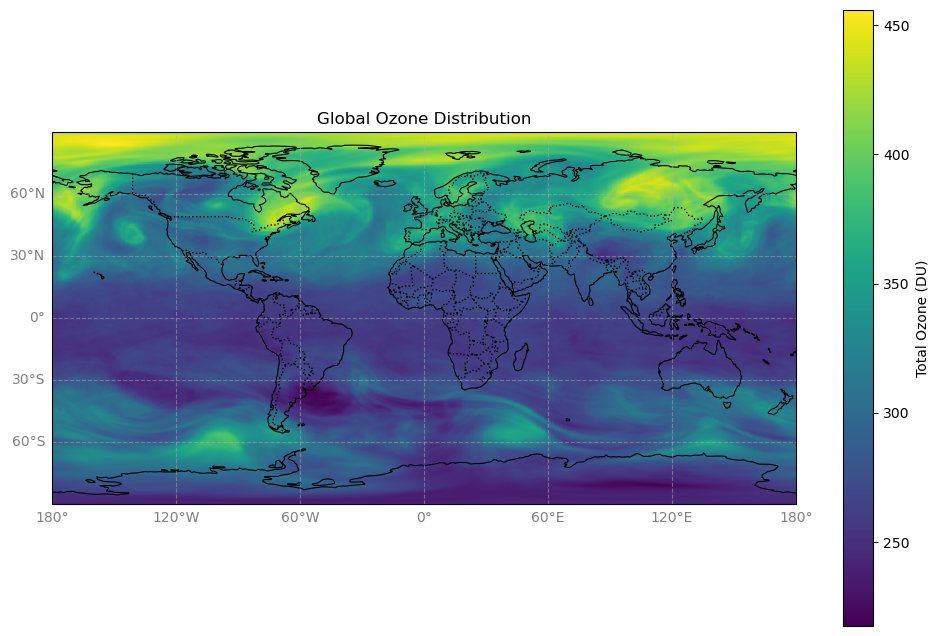

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from netCDF4 import Dataset
# Open the NetCDF file
file_path = "./M2T1NXSLV/MERRA2_400.tavg1_2d_slv_Nx.20230517.nc4"  # Replace with your file path
nc_data = Dataset(file_path, mode='r')

# Extract the data
lon = nc_data.variables['lon'][:]  # Longitude
lat = nc_data.variables['lat'][:]  # Latitude
ozone = nc_data.variables['TO3'][16, :, :]  # Select the first time step for TO3 (Total Ozone)

# Create the plot
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())  # Use PlateCarree projection (latitude/longitude)

# Add world map features
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE, linewidth=0.8)
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

# Plot the ozone data on the map
mesh = plt.pcolormesh(lon, lat, ozone, transform=ccrs.PlateCarree(), cmap='viridis')
plt.colorbar(mesh, orientation='vertical', label='Total Ozone (DU)')  # Adjust label based on your units

# Add gridlines and labels
gridlines = ax.gridlines(draw_labels=True, linestyle='--', alpha=0.5)
gridlines.xlabels_top = False  # Disable labels at the top
gridlines.ylabels_right = False  # Disable labels on the right
gridlines.xlabel_style = {'size': 10, 'color': 'gray'}
gridlines.ylabel_style = {'size': 10, 'color': 'gray'}

# Set x and y ticks
#ax.set_xticks(range(-180, 181, 30), crs=ccrs.PlateCarree())  # Longitude from -180 to 180
#ax.set_yticks(range(-90, 91, 15), crs=ccrs.PlateCarree())  # Latitude from -90 to 90

# Add title
plt.title('Global Ozone Distribution')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()